In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from Algorithms import AdaBoost, SVM, NonlinearSVM, Logistic, BaggingClassifier, sampling
from utils import cllassification_report, plot_matrix, confusion_matrix, plot_roc_curve

titanic_data = pd.read_csv('train.csv')

## Preprocessing


In [2]:
label_encoder = LabelEncoder()

titanic_data.fillna(titanic_data.median(numeric_only=True), inplace=True)

titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(
    titanic_data['Embarked'])
titanic_data['Pclass'] = label_encoder.fit_transform(titanic_data['Pclass'])


X = titanic_data.drop(
    columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])
y = titanic_data['Survived']

## Scaling Dataset


In [3]:
X_selected = titanic_data[['Pclass', 'Sex', 'Parch', 'Embarked', 'SibSp']]

In [4]:
X_sampled, y_sampled = sampling(X_selected, y)

In [5]:
scaler = StandardScaler()
scaler.fit(X_sampled)
X_sampled = scaler.transform(X_sampled)
y_sampled = y_sampled.to_numpy()

## Splitting Dataset to Train and Test


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sampled, y_sampled, test_size=0.2, random_state=22)

print(X_selected.shape, X_train.shape, X_test.shape)

(891, 5) (712, 5) (179, 5)


## Linear SVM Model

### Using Bagging


In [7]:
svm_bagging = BaggingClassifier(
    base_estimator=SVM, n_estimators=5)
scores = svm_bagging.fit(X_train, y_train)

print("Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.76544944 0.76404494 0.74157303 0.78651685 0.75983146]
Mean Accuracy: 0.7634831460674157
Standard Deviation: 0.014339605638314852


In [8]:
y_test_pred = svm_bagging.predict(X_test)

print(cllassification_report(y_test, y_test_pred))

Label      Precision    Recall  F1-score   Support
--------------------------------------------------
0               0.79      0.79      0.79        90
1               0.79      0.79      0.79        89
--------------------------------------------------
Accuracy                                      0.79
Support                                        179



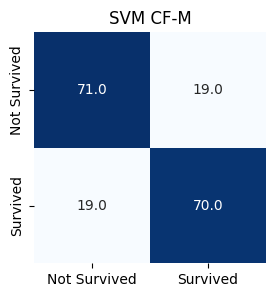

In [9]:
cf = confusion_matrix(y_test, y_test_pred)

plot_matrix(cf, 'SVM')

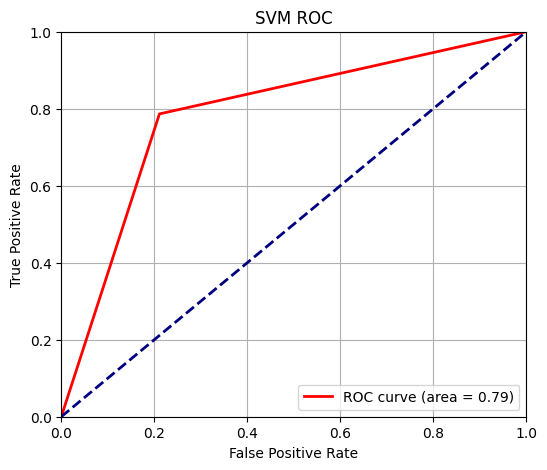

In [10]:
plot_roc_curve(y_test, y_test_pred, 'SVM')

## Non-Linear SVM Model

### Using Bagging

In [11]:
non_svm_bagging = BaggingClassifier(
    base_estimator=NonlinearSVM, n_estimators=5)
scores = non_svm_bagging.fit(X_train, y_train)


print("Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.73033708 0.66151685 0.79494382 0.70365169 0.81882022]
Mean Accuracy: 0.7418539325842697
Standard Deviation: 0.057945564309780345


In [12]:
y_test_pred = non_svm_bagging.predict(X_test)

print(cllassification_report(y_test, y_test_pred))

Label      Precision    Recall  F1-score   Support
--------------------------------------------------
0               0.62      0.70      0.65        90
1               0.73      0.66      0.69        89
--------------------------------------------------
Accuracy                                      0.68
Support                                        179



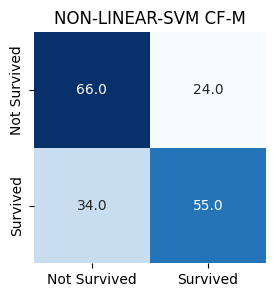

In [13]:
cf = confusion_matrix(y_test, y_test_pred)

plot_matrix(cf, 'NON-LINEAR-SVM')

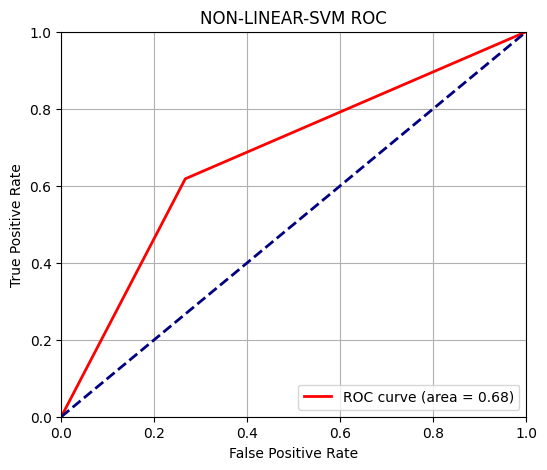

In [14]:
plot_roc_curve(y_test, y_test_pred, 'NON-LINEAR-SVM')

## Logistic Regression Model

### Using Bagging


In [15]:
log_bagging = BaggingClassifier(
    base_estimator=Logistic, n_estimators=5)
scores = log_bagging.fit(X_train, y_train)


print("Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79775281 0.74719101 0.8005618  0.79775281 0.74016854]
Mean Accuracy: 0.776685393258427
Standard Deviation: 0.027059763098409625


In [16]:
y_test_pred = log_bagging.predict(X_test)

print(cllassification_report(y_test, y_test_pred))

Label      Precision    Recall  F1-score   Support
--------------------------------------------------
0               0.81      0.77      0.79        90
1               0.76      0.80      0.78        89
--------------------------------------------------
Accuracy                                      0.78
Support                                        179



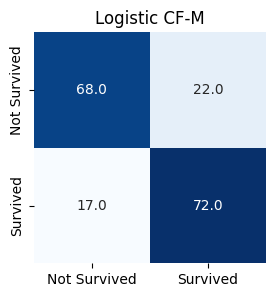

In [17]:
cf = confusion_matrix(y_test, y_test_pred)
plot_matrix(cf, 'Logistic')

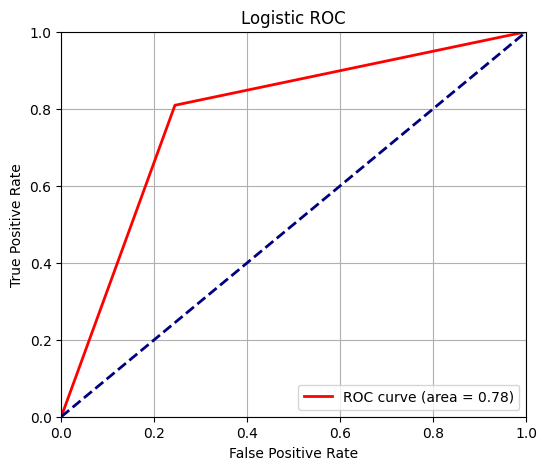

In [18]:
plot_roc_curve(y_test, y_test_pred, 'Logistic')

## AdaBoost Model

### Using Bagging


In [19]:
ada_bagging = BaggingClassifier(
    base_estimator=AdaBoost, n_estimators=5)
scores = ada_bagging.fit(X_train, y_train)

print("Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.69803371 0.77106742 0.72331461 0.71629213 0.78792135]
Mean Accuracy: 0.7393258426966292
Standard Deviation: 0.03423741344987099


In [20]:
y_test_pred = ada_bagging.predict(X_test)

print(cllassification_report(y_test, y_test_pred))

Label      Precision    Recall  F1-score   Support
--------------------------------------------------
0               0.88      0.64      0.74        90
1               0.52      0.81      0.64        89
--------------------------------------------------
Accuracy                                      0.70
Support                                        179



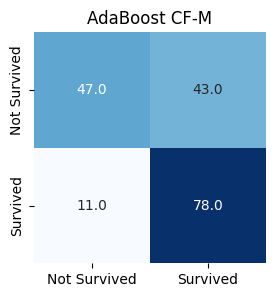

In [21]:
cf = confusion_matrix(y_test, y_test_pred)
plot_matrix(cf, 'AdaBoost')

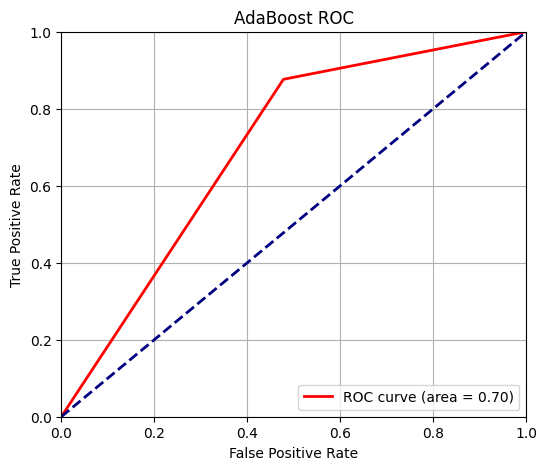

In [22]:
plot_roc_curve(y_test, y_test_pred, 'AdaBoost')